In [35]:
!pip install opencv-python numpy matplotlib

# **1. Reading and Displaying an Image**

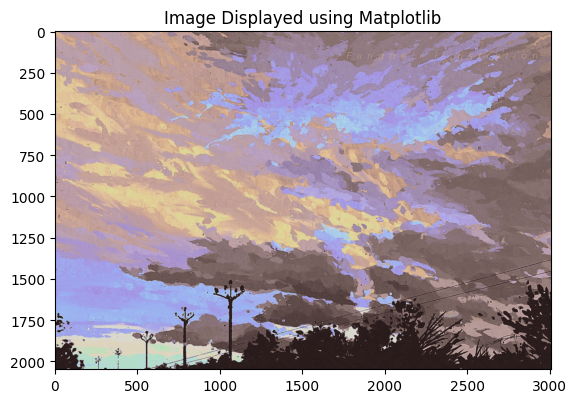

In [36]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("sample.png")
# cv2.imshow(img)                   # cv2.imshow is disabled by colab
plt.imshow(img)
plt.title("Image Displayed using Matplotlib")
plt.show()

# **2. Understanding Image Shape and Channels**

In [37]:
print("Image shape:", img.shape)
print("Data type:", img.dtype)

Image shape: (2048, 3007, 3)
Data type: uint8


# **3. Splitting and Visualizing Channels**


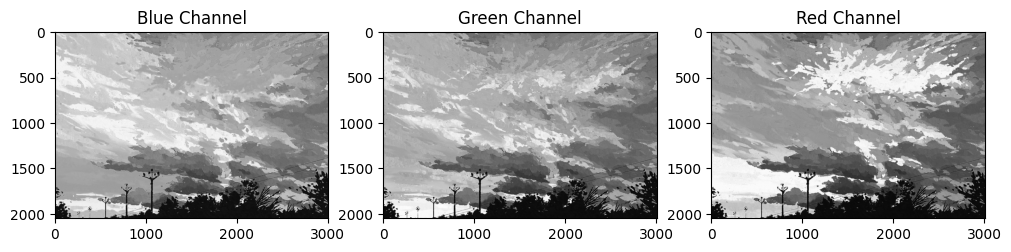

In [38]:
b, g, r = cv2.split(img)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")
plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")
plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")
plt.show()

# **4. Pixel Coordinates and Intensity Values**

img[row, column] → img[y, x] \
\
output format : [B, G, R]

In [39]:
x, y = 100, 50
pixel = img[y, x]
print("Pixel value at (x=100, y=50):", pixel)

Pixel value at (x=100, y=50): [234 189 148]


# **5. Modifying Pixel Values**

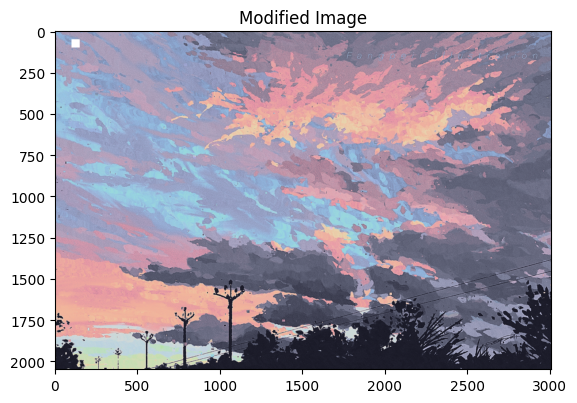

In [40]:
img_modified = img.copy()

# Set a small square to white
img_modified[50:100, 100:150] = [255, 255, 255]
plt.imshow(cv2.cvtColor(img_modified, cv2.COLOR_BGR2RGB))
plt.title("Modified Image")
plt.show()

# **6. Creating an Image from Scratch**

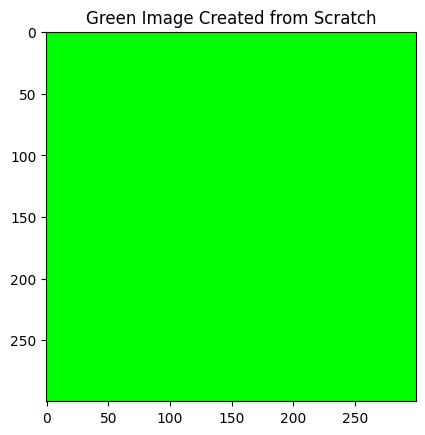

In [41]:
import numpy as np

blank = np.zeros((300, 300, 3), dtype=np.uint8)
blank[:] = [0, 255, 0] # Green image
plt.imshow(cv2.cvtColor(blank, cv2.COLOR_BGR2RGB))
plt.title("Green Image Created from Scratch")
plt.show()

# **7. Grayscale Conversion**

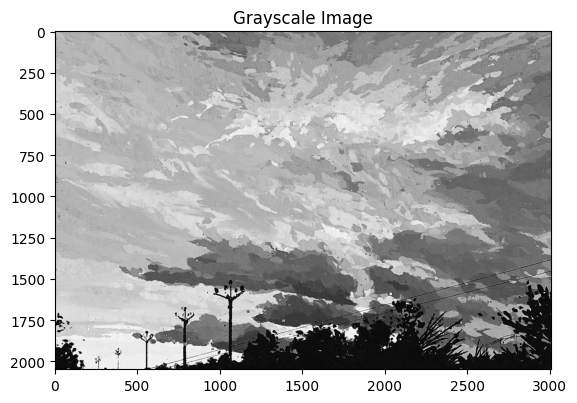

Grayscale image shape: (2048, 3007)


In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()

print("Grayscale image shape:", gray.shape)

\
\
\
\


# **Q1 : Print the pixel value at the center of the image**

In [43]:
x = img.shape[0] // 2
y = img.shape[1] // 2

pixel = img[y, x]
print("Pixel value at center:", pixel)

Pixel value at center: [70 52 51]


# **Q2 : Convert only the top half of the image to grayscale**

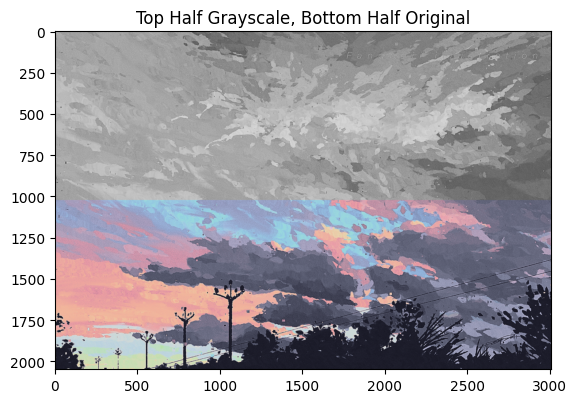

In [44]:
height, width, channels = img.shape
half_height = height // 2

top_half_color = img[0:half_height, :]

# Convert the top half to grayscale
# Convert grayscale back to a 3 channel image so it can be concatenated with the original image
top_half_gray = cv2.cvtColor(top_half_color, cv2.COLOR_BGR2GRAY)
top_half_gray_bgr = cv2.cvtColor(top_half_gray, cv2.COLOR_GRAY2BGR)

bottom_half_color = img[half_height:, :]

combined_image = np.vstack((top_half_gray_bgr, bottom_half_color))

plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title("Top Half Grayscale, Bottom Half Original")
plt.show()

# **Q3 Increase brightness of the image manually (without OpenCV functions)**

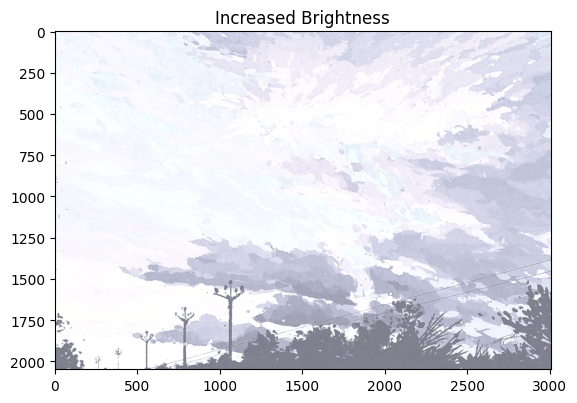

In [45]:
img_bright = img.copy()
brightness_factor = 100

# Add the brightness factor to all pixel values and clip to [0, 255]
img_bright = np.clip(img_bright.astype(int) + brightness_factor, 0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB))
plt.title("Increased Brightness")
plt.show()

# **4. Create a red square in the center of a blank image**

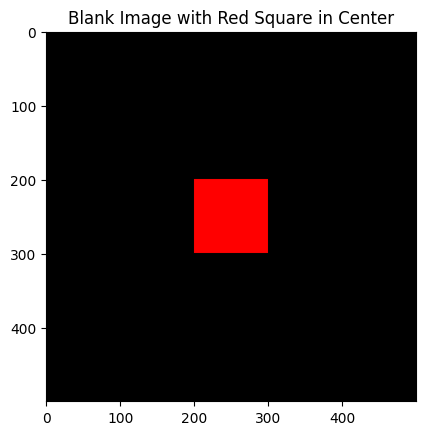

In [46]:
blank_image = np.zeros((500, 500, 3), dtype=np.uint8)
height, width = 500, 500
square_size = 100

# Calculate the top left corner coordinates of the square to center it
x1 = (width - square_size) // 2
y1 = (height - square_size) // 2
x2 = x1 + square_size
y2 = y1 + square_size

blank_image[y1:y2, x1:x2] = [0, 0, 255]

plt.imshow(cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB))
plt.title("Blank Image with Red Square in Center")
plt.show()

# **Q5. Swap Red and Blue channels and observe the effect**

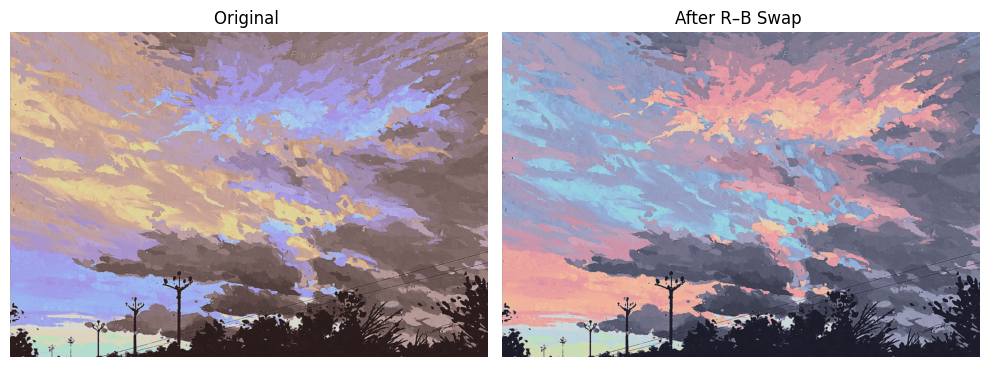

In [47]:
img_swapped = img.copy()

b, g, r = cv2.split(img_swapped)
img_rgb_swapped = cv2.merge([r, g, b])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].set_title("Original ")
axes[0].axis("off")

axes[1].imshow(img_rgb_swapped)
axes[1].set_title("After R–B Swap ")
axes[1].axis("off")

plt.tight_layout()
plt.show()


# **Q1 Image Format Conversion**

In [50]:
import os

cv2.imwrite("output.png", img)
print("output.png exists:", os.path.exists("output.png"))

output.png exists: True


# **Q2 : Metadata Extraction**

In [51]:
height, width, channels = img.shape
dtype = img.dtype

print("Height:", height)
print("Width:", width)
print("Channels:", channels)
print("Data Type:", dtype)

Height: 2048
Width: 3007
Channels: 3
Data Type: uint8


# **Q3 Image Resizing**

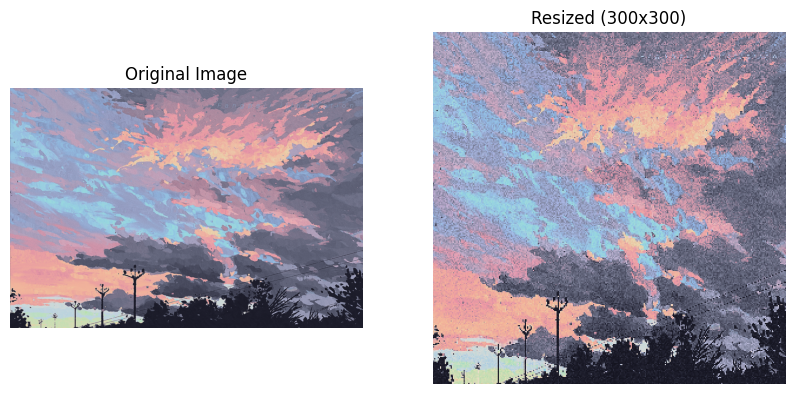

In [52]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resized = cv2.resize(img_rgb, (300, 300))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(resized)
axes[1].set_title("Resized (300x300)")
axes[1].axis("off")

plt.show()


# **Q4 Image Scaling**

Original shape: (2048, 3007, 3)
Scaled shape: (204, 300, 3)


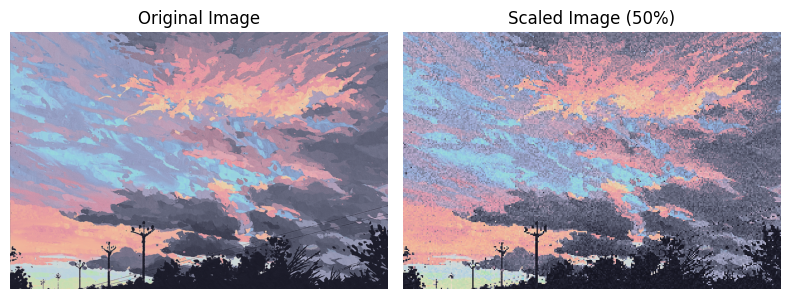

In [62]:
h, w = img.shape[:2]
scaled = cv2.resize(img, (w // 10, h // 10))

print("Original shape:", img.shape)
print("Scaled shape:", scaled.shape)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
scaled_rgb = cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(scaled_rgb)
plt.title("Scaled Image (50%)")
plt.axis("off")

plt.tight_layout()
plt.show()

# **Q5 Color Space Conversion (BGR to Grayscale)**

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("Grayscale shape:", gray.shape)

Grayscale shape: (2048, 3007)


# **Q6 Re-conversion Analysis (Grayscale to BGR)**

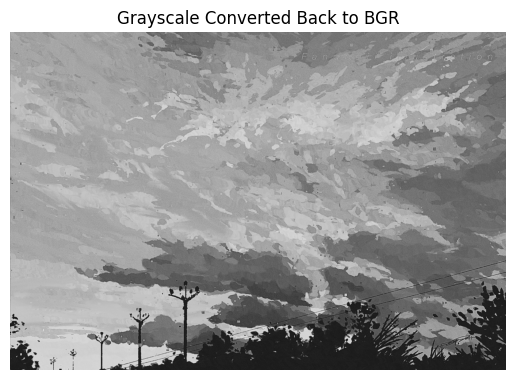

In [55]:
bgr_from_gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
bgr_from_gray_rgb = cv2.cvtColor(bgr_from_gray, cv2.COLOR_BGR2RGB)

plt.imshow(bgr_from_gray_rgb)
plt.title("Grayscale Converted Back to BGR")
plt.axis("off")
plt.show()

# **Q7 Pixel Intensity Distribution (Histogram)**

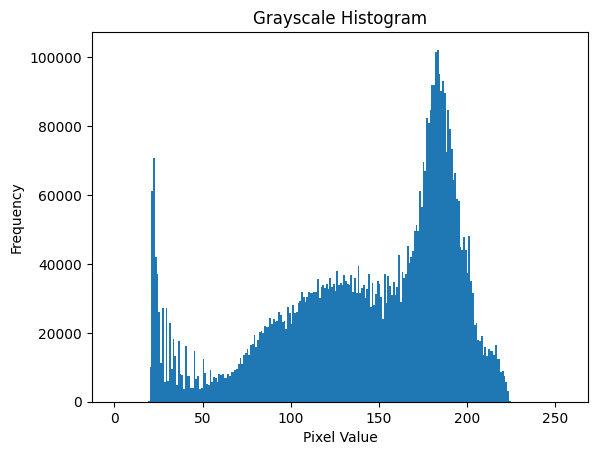

In [56]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.hist(gray.ravel(), bins=256, range=(0, 256))
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("Grayscale Histogram")
plt.show()

# **Q8 Image Normalization**

In [57]:
img_float = img.astype(np.float32)
img_norm = img_float / 255.0

print("Min value:", img_norm.min())
print("Max value:", img_norm.max())

Min value: 0.07058824
Max value: 0.9607843


# **Q9 Negative of an image**

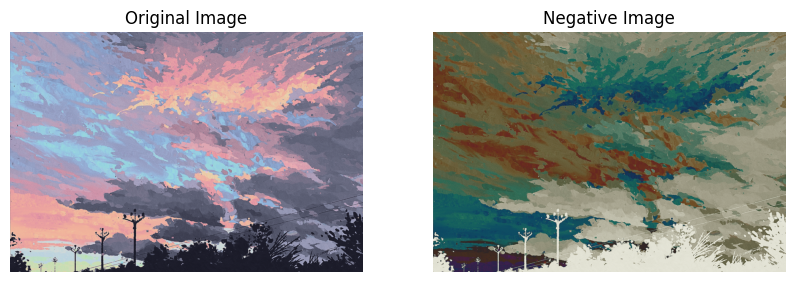

In [63]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

negative = 255 - img_rgb

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(negative)
axes[1].set_title("Negative Image")
axes[1].axis("off")

plt.show()

# **Q10 Binary Thresholding**

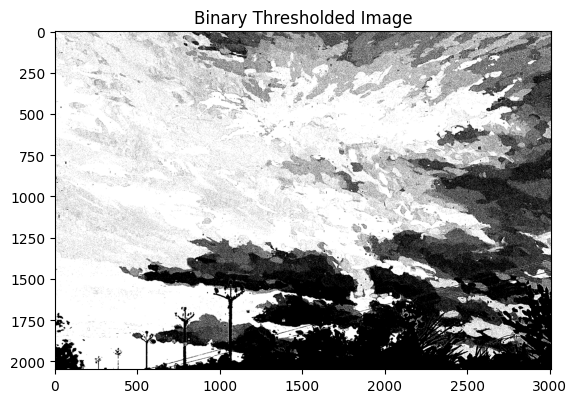

In [65]:
_, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.title("Binary Thresholded Image")
plt.show()